In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import * 
from fastai.vision import *

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data("https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet")

In [5]:
path
path.ls()

[PosixPath('/home/lixiuxian/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/lixiuxian/.fastai/data/oxford-iiit-pet/images')]

In [6]:
path_anno = path/'annotations'
path_img = path/'images'

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/lixiuxian/.fastai/data/oxford-iiit-pet/images/chihuahua_194.jpg'),
 PosixPath('/home/lixiuxian/.fastai/data/oxford-iiit-pet/images/Maine_Coon_77.jpg'),
 PosixPath('/home/lixiuxian/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_174.jpg'),
 PosixPath('/home/lixiuxian/.fastai/data/oxford-iiit-pet/images/basset_hound_116.jpg'),
 PosixPath('/home/lixiuxian/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_67.jpg')]

In [14]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [15]:
# The image data bunch will contain the training, validation and testing data

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chihuahua,Maine_Coon,american_pit_bull_terrier,Egyptian_Mau,Siamese
Path: /home/lixiuxian/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,american_bulldog,saint_bernard,chihuahua,Bombay
Path: /home/lixiuxian/.fastai/data/oxford-iiit-pet/images;

Test: None

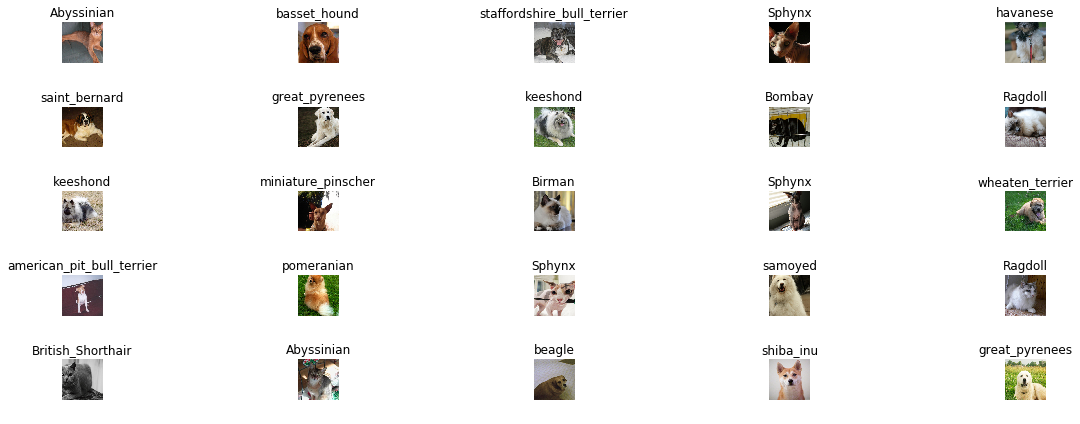

In [16]:
data.show_batch(row=1, figsize=(17,6))

In [17]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/opt/anaconda/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.353772,0.281271,0.092016,00:22
1,0.340838,0.272995,0.089986,00:22
2,0.286538,0.237685,0.083221,00:22
3,0.200303,0.221144,0.073748,00:23


In [22]:
# To get the outcome (the classification results)

interp = ClassificationInterpretation.from_learner(learn)

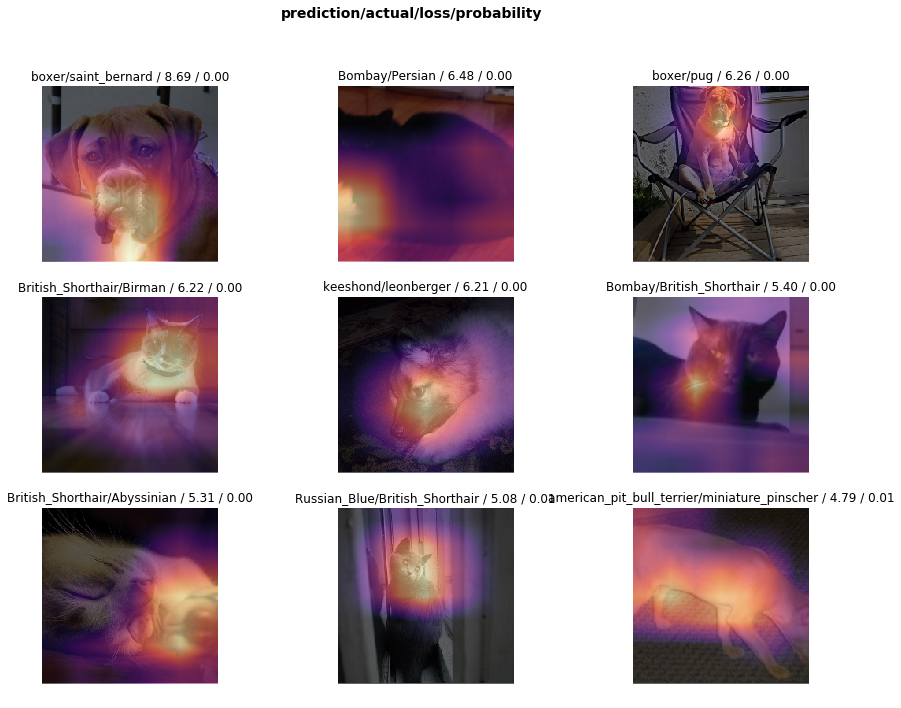

In [23]:
interp.plot_top_losses(9, figsize=(15, 11))

In [24]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('beagle', 'basset_hound', 4),
 ('Birman', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('boxer', 'american_bulldog', 3),
 ('Abyssinian', 'Maine_Coon', 2),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

### Other Data Formats

In [25]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/lixiuxian/.fastai/data/mnist_sample')

In [27]:
(path/'train').ls()

[PosixPath('/home/lixiuxian/.fastai/data/mnist_sample/train/3'),
 PosixPath('/home/lixiuxian/.fastai/data/mnist_sample/train/7')]

In [30]:
# If the label has the exact folder name, use from_folder() to get the labels directly

tfms = get_transforms(do_flip=False)
data =  ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [31]:
df = pd.read_csv(path/'labels.csv')

In [32]:
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [34]:
# If the labels are stored inside csv files, use from_csv() to get the label name

data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

In [35]:
fn_paths = [path/name for name in df['name']]
fn_paths[:2]

[PosixPath('/home/lixiuxian/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/lixiuxian/.fastai/data/mnist_sample/train/3/21102.png')]

In [37]:
# If the label is hidden in the path name, use regular expressions and from_name_re()

pat = r'/(\d)/\d+\.png$'
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [41]:
# If the label cannot be expressed in regular expressions, create a function

data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
                                    label_func=lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']